In [81]:
# Import all necessary Python packages
import os
import category_encoders as ce
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [82]:
# Variables related to the data analysis

dataset_path = '../data/bank-additional-full.csv'
eda_folder_path = '../exploratory_analysis'
encoder_path = '../utils/target_encoder.pkl'


### 1. Data Analysis

In [83]:
# Loading the data
data = pd.read_csv(dataset_path)

In [84]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 1.1 Understanding the data

#### Input variables:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

##### Related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric).


##### Other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


##### Social and economic context attributes:
16 - emp.var.rate: employment variation rate - quarterly indicator that shows how the rate of employment is changing over time. (numeric)

17 - cons.price.idx: consumer price index - monthly indicator that measures the average change over time in the prices paid by consumers for a basket of goods and services. (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator, but it measures how optimistic or pessimistic consumers are regarding their expected financial situation, as well as the overall state of the economy. (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator that shows the interest rate at which European banks lend money to each other for a 3-month period. It's a good indicator of the health of the banking sector and the broader economy. (numeric)

20 - nr.employed: number of employees - quarterly indicator that reflects the total number of people employed. An increase in this number suggests that more people are getting jobs, which can lead to increased consumer spending and a boost in the economy. (numeric)


##### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [78]:
# Overview of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41188 non-null  int64  
 1   job              41188 non-null  float64
 2   marital          41188 non-null  float64
 3   education        41188 non-null  float64
 4   default          41188 non-null  int64  
 5   housing          41188 non-null  int64  
 6   loan             41188 non-null  int64  
 7   contact          41188 non-null  int64  
 8   duration         41188 non-null  int64  
 9   campaign         41188 non-null  int64  
 10  pdays            41188 non-null  int64  
 11  previous         41188 non-null  int64  
 12  poutcome         41188 non-null  int64  
 13  emp.var.rate     41188 non-null  float64
 14  cons.price.idx   41188 non-null  float64
 15  cons.conf.idx    41188 non-null  float64
 16  euribor3m        41188 non-null  float64
 17  nr.employed 

### Target Variable Distribution

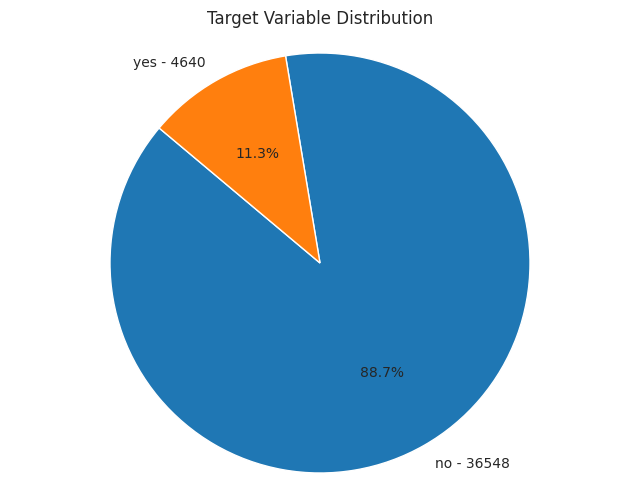

In [88]:
# Calculate value counts
value_counts = data['y'].value_counts()

# Generate labels with category name and count
labels = [f'{category} - {count}' for category, count in value_counts.items()]

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Target Variable Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.show()

In [89]:
# Overall Data Distribution

data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [90]:
# Checking for the missing values in the dataset

print(data.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


#### There is no missing data in the dataset

In [91]:
# Checking for 'unknown' values in all categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
for index, column in enumerate(categorical_columns):
    unknowns = (data[column] == 'unknown').sum()
    if unknowns > 0:
        print(f"{column} has {unknowns} 'unknown' values")

job has 330 'unknown' values
marital has 80 'unknown' values
education has 1731 'unknown' values
default has 8597 'unknown' values
housing has 990 'unknown' values
loan has 990 'unknown' values


#### Currently not handling the unknown values, as in the test dataset also unknown values might be present

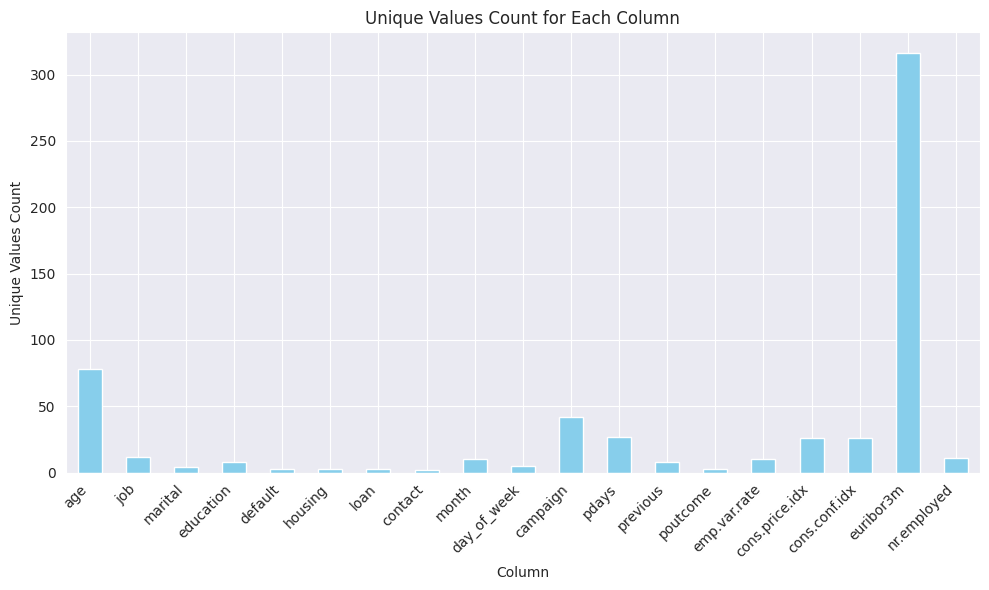

In [92]:
# Finding the unique values count for each of the columns. To understand Data Composition and gives overall idea about each feature in the dataset
# Not considering the below columns as duration of the call is removed from the analysis.

dataset = data.copy()

columns_to_remove = ['duration', 'y']
dataset.drop(columns_to_remove, axis=1, inplace=True)

unique_value_counts = dataset.nunique()

# Plot a grouped bar chart
plt.figure(figsize=(10, 6))
unique_value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Column')
plt.ylabel('Unique Values Count')
plt.title('Unique Values Count for Each Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### euribor3m, Age, campaign, pdays are having most of unique values. This also signifies that grouping the 'Age' column in groups will be more beneficial for the model

#### *Removing the duration column from the data, as we are trying to predict if the call should be made or not, so duration doesnt have importance

### 1.2 Feature Engineering

In [93]:
# Convert Target Variable(y) into numeric
data.y = data.y.map({'no': 0, 'yes': 1}).astype('uint8')

In [94]:
data.y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: uint8

In [96]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print(f"Total of categorical columns : {len(categorical_cols)}")
print(categorical_cols)

# Identify numerical columns
numerical_cols = data.select_dtypes(include=['number']).columns

print(f"Total of numerical columns : {len(numerical_cols)}")
print(numerical_cols)

Total of categorical columns : 10
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')
Total of numerical columns : 11
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


### 1.2.1: Categorical Data


In [97]:
categorical_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

#### Explore categorical features (EDA) analysis

In [98]:
# Build a function to 
def plot_bar(column_name):
    """
    Function to show categorical values distribution wrt target variable 'y'
    :param column_name: categorical column name
    :return: True if plotting was success
    """
    try:
        # declaring temp dataframe
        temp_1 = pd.DataFrame()
        # count categorical values
        temp_1['No_deposit'] = data[data['y'] == 0][column_name].value_counts()
        temp_1['Yes_deposit'] = data[data['y'] == 1][column_name].value_counts()
        temp_1.plot(kind='bar', color=['salmon', 'limegreen'])
        plt.xlabel(f'{column}')
        plt.ylabel('Number of customers')
        plot_title = 'Distribution of {} and deposit'.format(column)
        plt.title(plot_title)
        plt.savefig(os.path.join(eda_folder_path, '{}.png'.format(plot_title)))
        plt.show()
        return True
    except Exception as e:
        print("Error while plotting categorical values distribution : ",e)
        return False



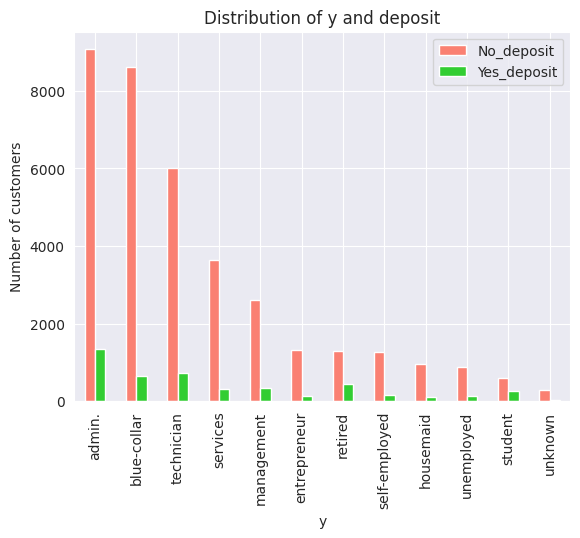

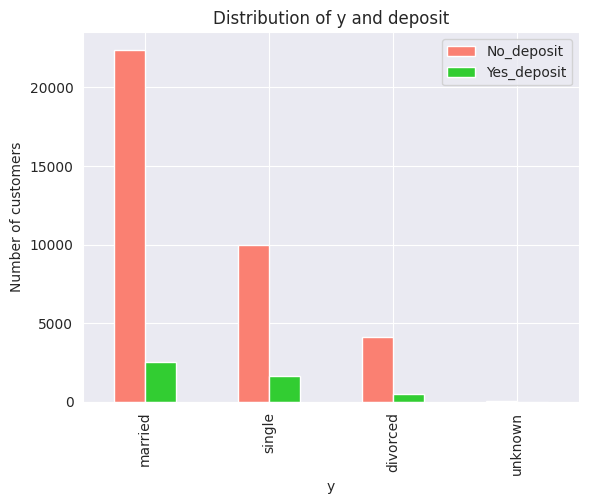

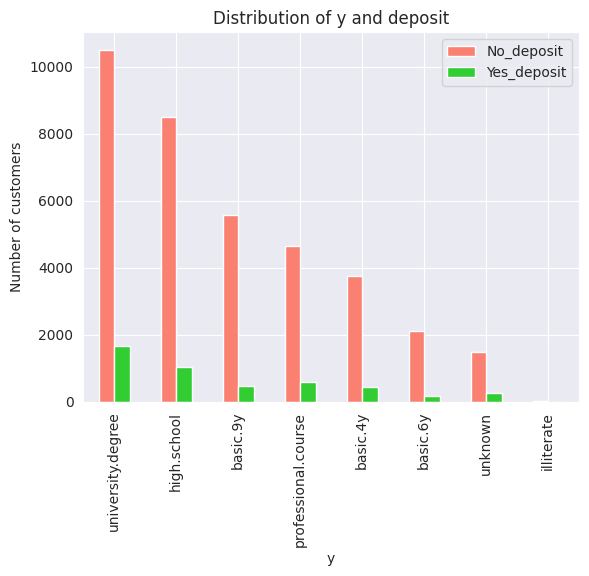

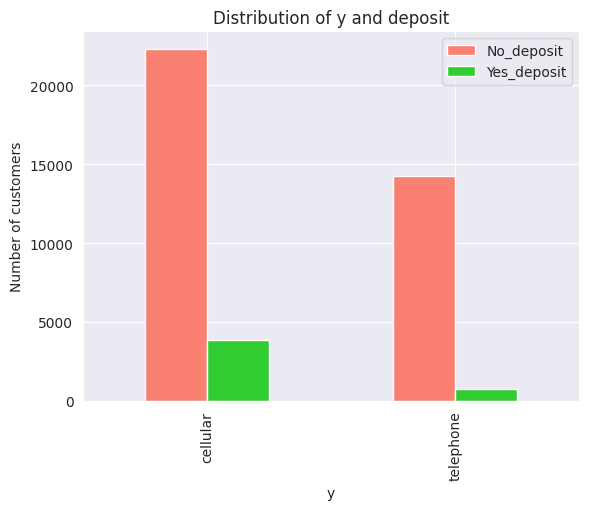

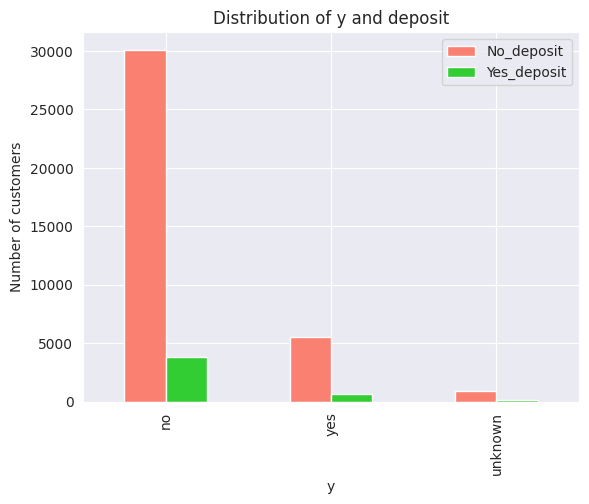

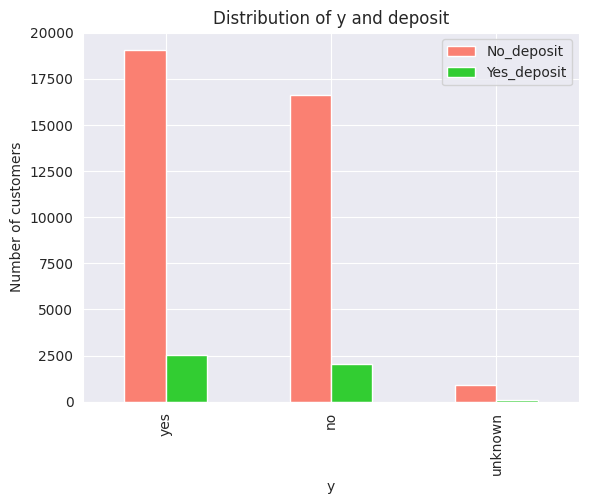

(True, True, True, True, True, True)

In [99]:
# Plotting for different categorical columns
plot_bar('job'), plot_bar('marital'), plot_bar('education'), plot_bar('contact'), plot_bar('loan'), plot_bar('housing')

### Label Encoding for some categorical columns

Have selected the columns with an inherent order or hierarchy.

In [100]:
cols_for_label_encoding = ['contact', 'loan', 'housing', 'default', 'poutcome']

In [101]:
label_encoder = LabelEncoder()

# Encode categorical columns
for col in cols_for_label_encoding:
    data[col] = label_encoder.fit_transform(data[col])

### Hot Encoding for some categorical columns

Have selected the columns that are nominal variables with multiple categories or levels.

In [102]:
cols_for_hot_encoding = ['month', 'day_of_week']

In [103]:
def encode(data, col):
    """
    Function to create hot encoding for certain column within the data
    :param data: Dataframe
    :param col: Column name
    :return: Updated Dataframe
    """
    return pd.concat([data, pd.get_dummies(col, prefix=col.name, dtype='uint')], axis=1)


for col in cols_for_hot_encoding:
    data = encode(data, data[col])

# Drop transformed features
data.drop(cols_for_hot_encoding, axis=1, inplace=True)

### Target Encoding for some categorical columns

Have selected variables with a significant relationship with the target variable.

In [104]:
cols_for_target_encoding = ['job', 'marital', 'education']

In [105]:
def target_encode_columns(dataset, columns_to_encode, target_column, save_encoder=True, encoder_path=None):
    """
    Encodes specified columns in the dataset using target encoding. Optionally saves the encoder for future use while predicting.

    Parameters:
    - dataset: A pandas DataFrame containing the data.
    - columns_to_encode: A list of column names (strings) to be target encoded.
    - target_column: The name of the target column (string).
    - save_encoder: Boolean, whether to save the encoder to a file.
    - encoder_path: Path to save the encoder if save_encoder is True.

    Returns:
    - A pandas DataFrame with the specified columns replaced by their target-encoded values.
    """
    if not isinstance(dataset, pd.DataFrame):
        raise ValueError("data must be a pandas DataFrame")

    X = dataset.drop(target_column, axis=1)
    y = dataset[target_column]

    target_encoder = ce.TargetEncoder(cols=columns_to_encode)
    target_encoder.fit(X, y)

    X_encoded = target_encoder.transform(X)
    X_encoded[target_column] = y

    if save_encoder and encoder_path:
        with open(encoder_path, 'wb') as file:
            pickle.dump(target_encoder, file)

    return X_encoded

In [106]:
data = target_encode_columns(data, cols_for_target_encoding, 'y', True, encoder_path)

### 1.2.1: Numerical Data

In [107]:
numerical_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

#### Explore numerical features (EDA)

In [108]:
# Build correlation matrix

subset = data[numerical_cols]
corr = subset.corr()
corr.style.background_gradient()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


### The correlations are:

age: 0.030399
duration: 0.405274
campaign: -0.066357
pdays: -0.324914
previous: 0.230181
emp.var.rate: -0.298334
cons.price.idx: -0.136211
cons.conf.idx: 0.054878
euribor3m: -0.307771
nr.employed: -0.354678

The feature with the highest positive correlation to the target 'y' is duration with 0.405274.
The feature with the highest negative correlation is nr.employed with -0.354678.

Overall, the correlations seem relatively low in magnitude across the different features, with most values falling between -0.3 and 0.3. This suggests that none of the individual features alone has an extremely strong linear relationship with the target variable based on these correlation values.

#### --> Adding the Age Group column in the data

In [109]:

def find_quantile_bins(data, column_name, column_group_name, num_bins=6):
    """
    Function to find the optimum bins for a given dataset and a column name
    :param data: Dataframe
    :param column_name: Column
    :param column_group_name: Desired new Column Group Name
    :param num_bins: Desired number of bins
    :return: Optimal Bin Edges, Bin Records and Updated Dataframe
    """
    # Ensure the column exists in the DataFrame
    if column_name not in data.columns:
        raise ValueError(f"{column_name} not found in DataFrame")

    # Ensure the column is numerical
    if not pd.api.types.is_numeric_dtype(data[column_name]):
        raise ValueError(f"{column_name} is not a numerical column")

    _, bin_edges = pd.qcut(data[column_name], q=num_bins, retbins=True, duplicates='drop')
    print(f"Quantile-based bin edges for {num_bins} bins: {bin_edges}")

    # Bin the data using the provided or calculated bin edges
    binned_data = pd.cut(data[column_name], bins=bin_edges, labels=False, include_lowest=True)

    # Convert binned data to integer
    binned_data = binned_data.astype(int)

    # Calculate the record counts for each bin
    bin_counts = binned_data.value_counts().sort_index()

    # Create a dictionary to store record counts for each bin
    bin_records = dict(bin_counts)

    data[column_group_name] = binned_data

    return bin_edges, bin_records, data


bin_edges, age_group_counts, data = find_quantile_bins(data, 'age', 'age_group')

print(age_group_counts)

Quantile-based bin edges for 6 bins: [17. 30. 34. 38. 44. 51. 98.]
{0: 7383, 1: 7371, 2: 6421, 3: 7079, 4: 6508, 5: 6426}


#### For the Age column, the bin edges are [17. 30. 34. 38. 44. 51. 98.]

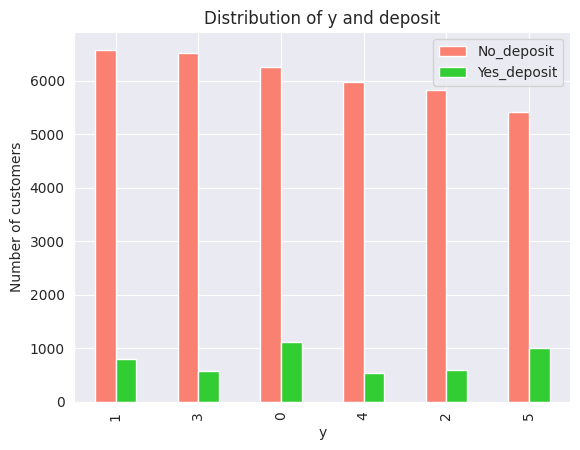

True

In [110]:
plot_bar('age_group')

#### --> Replacing 999 of 'pdays' column in the data

In [111]:
# Replace 999 with 0 for 'pdays' column
data.pdays = data.pdays.replace(999, 0)

### --> Scaling the Social and economic context attributes

Since this variable are not having higher variance, so extending the variable's range will improve variable's effect
Scaling of social and economic context attributes. Tried two different approaches:
 1. Min-Max Scaling
 2. Standard Scaler

In [112]:
# Tried the MinMaxScaler as the first, then switched to Standard Scaler
# # Initialize the MinMaxScaler
# min_max_scaler = MinMaxScaler()
# 
# # List of columns to scale
# columns_to_scale_min_max = ['emp.var.rate', 'cons.price.idx', 'nr.employed', 'euribor3m']
# 
# # Apply Min-Max scaling to the specified columns
# data[columns_to_scale_min_max] = min_max_scaler.fit_transform(data[columns_to_scale_min_max])
# 
# print("After Min-Max Scaling:")
# print(data['euribor3m'])


In [113]:
# Initialize the StandardScaler
standard_scaler = StandardScaler()

# List of columns to standardize
columns_to_standardize = ['emp.var.rate', 'cons.price.idx', 'nr.employed', 'euribor3m', 'cons.conf.idx']

# Apply Standardization to the specified columns
data[columns_to_standardize] = standard_scaler.fit_transform(data[columns_to_standardize])

print("After Standardization:")
print(data['cons.price.idx'])

After Standardization:
0        0.722722
1        0.722722
2        0.722722
3        0.722722
4        0.722722
           ...   
41183    2.058168
41184    2.058168
41185    2.058168
41186    2.058168
41187    2.058168
Name: cons.price.idx, Length: 41188, dtype: float64


### Dropping the duplicates from the dataset

In [114]:
'''Drop the dublicates'''
data.drop_duplicates(inplace=True)

In [115]:
data.shape

(41176, 35)

In [116]:
# save target variable before transformation
y = data.y

In [117]:
# Dropping the columns that are not required
# Duration column is dropped as it doesnt have any significance for the prediction of whether the call to a customer as to be made or not

cols_to_drop = ['age', 'duration', 'y']

data.drop(cols_to_drop, axis=1, inplace=True)

data

,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,...,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,age_group
0,0.100000,0.101573,0.102490,0,0,0,1,1,0,0,...,1,0,0,0,0,1,0,0,0,5
1,0.081381,0.101573,0.108355,1,0,0,1,1,0,0,...,1,0,0,0,0,1,0,0,0,5
2,0.081381,0.101573,0.108355,0,2,0,1,1,0,0,...,1,0,0,0,0,1,0,0,0,2
3,0.129726,0.101573,0.082024,0,0,0,1,1,0,0,...,1,0,0,0,0,1,0,0,0,3
4,0.081381,0.101573,0.108355,0,0,2,1,1,0,0,...,1,0,0,0,0,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.252326,0.101573,0.113485,0,2,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,5
41184,0.068943,0.101573,0.113485,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,4
41185,0.252326,0.101573,0.137245,0,2,0,0,2,0,0,...,0,1,0,0,1,0,0,0,0,5
41186,0.108260,0.101573,0.113485,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,3


In [118]:
''' Split data on train and test'''
# Stratifying during data splitting ensures that each split has approximately the same percentage of samples of each target class as the original dataset, maintaining a balanced representation and improving model evaluation.

# set global random state
random_state = 44

# split data
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=random_state, stratify=y)


In [119]:
# Saving the data into train and test data folders

# Create directories if they don't exist
train_folder = '../data/train_data'
test_folder = '../data/test_data'
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Save X_train to train folder
X_train.to_csv(os.path.join(train_folder, 'X_train.csv'), index=False)

# Save X_test to test folder
X_test.to_csv(os.path.join(test_folder, 'X_test.csv'), index=False)

# Save y_train to train folder
pd.DataFrame(y_train, columns=['y']).to_csv(os.path.join(train_folder, 'y_train.csv'), index=False)

# Save y_test to test folder
pd.DataFrame(y_test, columns=['y']).to_csv(os.path.join(test_folder, 'y_test.csv'), index=False)


In [120]:
X_train.shape

(32940, 32)

In [121]:
y_train.shape

(32940,)

In [122]:
X_test.shape

(8236, 32)

In [123]:
y_test.shape

(8236,)